In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

################################
# TAREA 4 Modelos Estadisticos #
################################

##############
# PROBLEMA 1 #
##############
datosP1=pd.read_csv('DatosP1.csv')
X=datosP1['X'].to_numpy()
Y=datosP1['Y'].to_numpy()

In [19]:
# Funciones para obtener valores en el modelo de regresión
b1 =lambda X,Y: sum((X-np.mean(X,dtype=np.float64))*(Y-np.mean(Y,dtype=np.float64)))/sum((X-np.mean(X,dtype=np.float64))**2)
b0=lambda X,Y,p:np.mean(Y,dtype=np.float64)-p*np.mean(X,dtype=np.float64)
estY=lambda X,b0,b1:b0+b1*X

def mssRes(X,Y):
    beta1=b1(X,Y)
    beta0=b0(X,Y,beta1)
    hatY=estY(X,beta0,beta1)
    return sum((Y-hatY)**2)/(len(X)-2)

def mssReg(X,Y):
    value=(b1(X,Y)**2)*(sum((X-np.mean(X,dtype=np.float64))**2))
    return value

def varb0(X,Y):
    sigma2=mssRes(X,Y)
    aux=((np.mean(X,dtype=np.float64))**2)/sum((X-np.mean(X,dtype=np.float64))**2)
    value=(1/len(X)+aux)*sigma2
    return value

def varb1(X,Y):
    sigma2=mssRes(X,Y)
    value=sigma2/sum((X-np.mean(X,dtype=np.float64))**2)
    return value


In [20]:
# Estimaciones hechas por Mínimos Cuadrados Ordinarias
beta1_MCO=b1(X,Y)
beta0_MCO=b0(X,Y,beta1_MCO)
Y_ajustado=estY(X,beta0_MCO,beta1_MCO) # Eje horizonal 
residuos=Y-Y_ajustado # Eje vertical

MODELO REGRESION SIMPLE (Minimos Cuadrados Ordinarios)

Los coeficientes son b0=-0.5059 y b1=1.1272

Las varianzas V(b0)=0.6907, V(b1)=0.0105


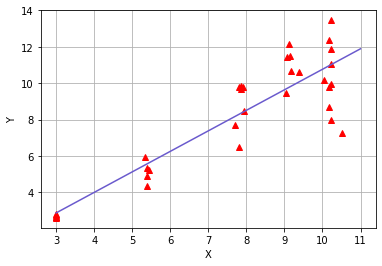

In [21]:
# Inciso a)
print("MODELO REGRESION SIMPLE (Minimos Cuadrados Ordinarios)")

print("\nLos coeficientes son b0=%.4f y b1=%.4f" %(b0(X,Y,b1(X,Y)),b1(X,Y)))

print("\nLas varianzas V(b0)=%.4f, V(b1)=%.4f" %(varb0(X,Y),varb1(X,Y)))

figA=plt.figure(figsize=(6,4))
ax=figA.add_subplot(111)
ax.plot(X,Y,'^r')
domX=np.arange(min(X),max(X)+1)
ax.plot(domX,estY(domX,beta0_MCO,beta1_MCO),color='slateblue')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

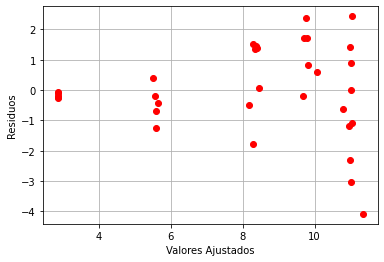

In [22]:
# inciso b)
figB=plt.figure()
ax=figB.add_subplot(111)
ax.plot(Y_ajustado,residuos,'or')
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

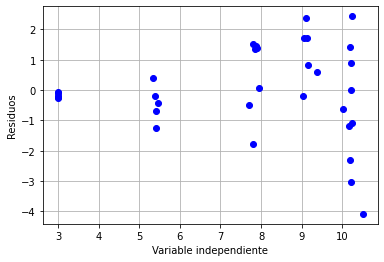

In [23]:
# inciso c)
figC=plt.figure()
ax=figC.add_subplot(111)
ax.plot(X,residuos,'ob')
plt.xlabel("Variable independiente")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()

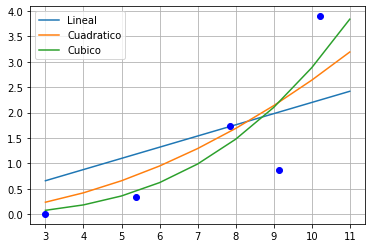

In [24]:
# inciso d)

# Medias por grupo
Xmean=np.array([np.mean(X[0:5]),np.mean(X[5:10]),np.mean(X[10:17]),np.mean(X[17:23]),np.mean(X[23:])])
# Varianzas por grupo
Yvar=np.array([np.var(Y[0:5],ddof=1),np.var(Y[5:10],ddof=1),np.var(Y[10:17],ddof=1),np.var(Y[17:23],ddof=1),np.var(Y[23:],ddof=1)])

# Pendiente regresion por el origen
b1_RO=lambda X,Y: sum(X*Y)/sum(X*X)

figD=plt.figure()
ax=figD.add_subplot(111)
domX=np.arange(min(X),max(X)+1)
ax.plot(domX,domX*b1_RO(Xmean,Yvar),label='Lineal')
ax.plot(domX,(domX**2)*b1_RO(Xmean**2,Yvar),label='Cuadratico')
ax.plot(domX,(domX**3)*b1_RO(Xmean**3,Yvar),label='Cubico')
plt.plot(Xmean,Yvar,'ob')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# Asignar pesos cúbicos
# inciso e)
sigma2=b1_RO(Xmean**3,Yvar)*(X**3)
W=1.0/sigma2
invV=np.diag(W)



MODELO REGRESION SIMPLE (Minimos Cuadrados Ponderados)

Los coeficientes son b0=-0.8363 y b1=1.1728

Las varianzas V(b0)=0.0609, V(b1)=0.0030


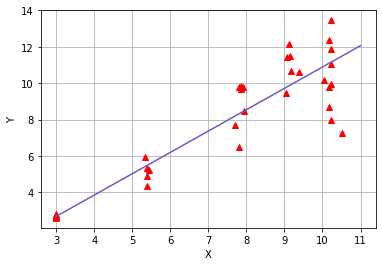

In [26]:
# Regresión (Mínimos cuadrados ponderados)
# inciso f)
Xreg=np.array([np.ones(len(Y)),X]).T
Yreg=np.array([Y]).T
beta_MCP=np.linalg.inv(Xreg.T@invV@Xreg)@(Xreg.T@invV@Yreg)
Var_beta_MCP=np.linalg.inv(Xreg.T@invV@Xreg)*((Yreg-Xreg@beta_MCP).T@invV@(Yreg-Xreg@beta_MCP))/(len(X)-2)
print("\n\nMODELO REGRESION SIMPLE (Minimos Cuadrados Ponderados)")

print("\nLos coeficientes son b0=%.4f y b1=%.4f" %(beta_MCP[0],beta_MCP[1]))

print("\nLas varianzas V(b0)=%.4f, V(b1)=%.4f" %(Var_beta_MCP[0][0],Var_beta_MCP[1][1]))

figF=plt.figure()
ax=figF.add_subplot(111)
ax.plot(X,Y,'^r')
domX=np.arange(min(X),max(X)+1)
ax.plot(domX,estY(domX,beta_MCP[0],beta_MCP[1]),color='slateblue')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [27]:
##############
# PROBLEMA 2 #
##############
datosP2=pd.read_csv('DatosP2.csv')
X0=datosP2['X0'].to_numpy()
X1=datosP2['X1'].to_numpy()
X2=datosP2['X2'].to_numpy()
Z1=datosP2['Z1'].to_numpy()
Z2=datosP2['Z2'].to_numpy()
Y_P2=datosP2['Y'].to_numpy()
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)}) # Imprimir 4 decimales

# inciso a)

# Matrices de diseno
Xdis=np.array([X0,X1,X2]).T
Zdis=np.array([Z1,Z2]).T
Ydis=np.array([Y_P2]).T

# Matriz completa
Wdis=np.array([X0,X1,X2,Z1,Z2]).T

# Proyeccion ortogonal
R=np.identity(np.shape(Xdis)[0])-Xdis@(np.linalg.inv(Xdis.T@Xdis))@Xdis.T
RG=np.identity(np.shape(Wdis)[0])-Wdis@(np.linalg.inv(Wdis.T@Wdis))@Wdis.T
L=np.linalg.inv(Xdis.T@Xdis)@Xdis.T@Zdis
M=np.linalg.inv(Zdis.T@R@Zdis)

In [28]:

# inciso b)

# parte ii)
gamma_G=M@Zdis.T@R@Ydis
hat_beta=np.linalg.inv(Xdis.T@Xdis)@Xdis.T@Ydis
print("La expresion para gamma_G es:\n")
print(gamma_G)




La expresion para gamma_G es:

[[0.5307]
 [0.3649]]


In [29]:
# parte i)
beta_G=hat_beta-L@gamma_G
print("La expresion para beta_G es:\n")
print(beta_G)


La expresion para beta_G es:

[[-8.4952]
 [1.6721]
 [1.1769]]


In [30]:
# parte iii)
YTR_GY_Exp1=(Ydis-Zdis@gamma_G).T@R@(Ydis-Zdis@gamma_G)
print("La primera expresion para YTR_GY es:\n")
print(YTR_GY_Exp1)

La primera expresion para YTR_GY es:

[[84.8917]]


In [31]:
# parte iv)
YTR_GY_Exp2=Ydis.T@R@Ydis-gamma_G.T@Zdis.T@R@Ydis
print("La segunda expresion para YTR_GY es:\n")
print(YTR_GY_Exp2)

La segunda expresion para YTR_GY es:

[[84.8917]]


In [32]:
# parte v)
delta_G=np.linalg.inv(Wdis.T@Wdis)@Wdis.T@Ydis
print("La estimacion de MC de delta_G es:\n")
print(delta_G)
s2_G=(((Ydis-Wdis@delta_G).T@(Ydis-Wdis@delta_G))/(len(Y_P2)-5))[0][0]
print("\nEstimacion de la varianza:\n ")
print("%.4f" %(s2_G))

La estimacion de MC de delta_G es:

[[-8.4952]
 [1.6721]
 [1.1769]
 [0.5307]
 [0.3649]]

Estimacion de la varianza:
 
5.6594


In [33]:
# Varianza del estimador delta_G
block11=np.linalg.inv(Xdis.T@Xdis)+L@M.T@L.T
block12=(-1)*(L@M)
block21=block12.T
block22=M

Var_delta_G=np.block([[block11,block12],[block21,block22]])
print("La matriz de covarianzas del estimador delta_G es:\n")
print(Var_delta_G)


La matriz de covarianzas del estimador delta_G es:

[[1.1835 -0.0370 -0.0334 -0.0487 -0.0142]
 [-0.0370 0.0065 0.0004 0.0007 -0.0004]
 [-0.0334 0.0004 0.0033 0.0013 -0.0005]
 [-0.0487 0.0007 0.0013 0.0030 0.0002]
 [-0.0142 -0.0004 -0.0005 0.0002 0.0013]]
